# DRIVERS DROWSINESS DETECTION USING CNN AND OPEN CV

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2

# Importing Dataset

In [ ]:
!unzip dataset_new.zip -d /dataset_new

unzip:  cannot find or open /dataset_new.zip, /dataset_new.zip.zip or /dataset_new.zip.ZIP.


In [ ]:
labels = os.listdir("/dataset_new/dataset_new/train")

In [ ]:
labels

['Open', 'Closed', 'no_yawn', 'yawn']

# Viewing Images in the Dataset

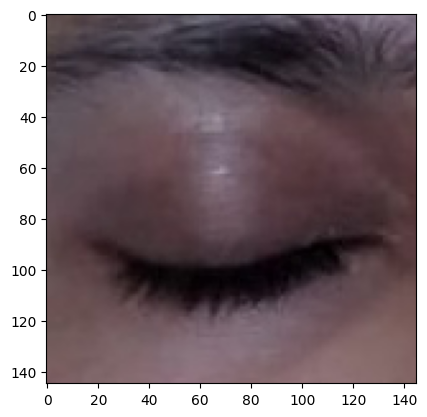

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/dataset_new/dataset_new/train/Closed/_0.jpg"))

In [ ]:
a = plt.imread("/dataset_new/dataset_new/train/yawn/1.jpg")

In [ ]:
a.shape

(480, 640, 3)

In [ ]:
#visualize yawn image.

#Here background is unnecessary. we need only face image array

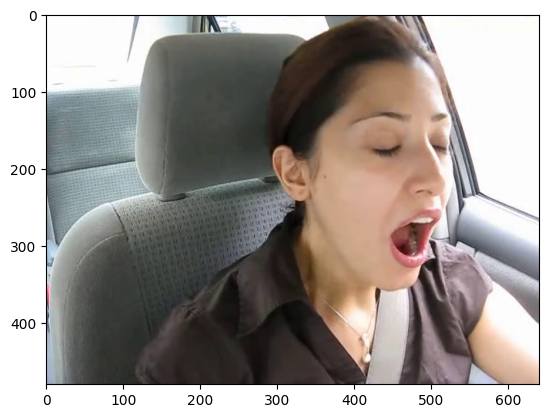

In [ ]:
plt.imshow(plt.imread("/dataset_new/dataset_new/train/yawn/1.jpg"))

# for yawn and not_yawn. Taking only face

In [ ]:
def face_for_yawn(direc="/dataset_new/dataset_new/train", face_cas_path="/dataset_new/dataset_new/train/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)

            resized_array = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))
            yaw_no.append([resized_array, class_num1])
    return yaw_no

In [ ]:
yawn_no_yawn = face_for_yawn()

0
1


# For Closed and Open Eyes

In [ ]:
def get_data(dir_path="/dataset_new/dataset_new/train", face_cas="/dataset_new/dataset_new/train/haarcascade_frontalface_default.xml", eye_cas="/dataset_new/dataset_new/train/haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [ ]:
data_train = get_data()

2
3


In [ ]:
#Extend data and convert array

In [ ]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

In [ ]:
#New variable to store

In [ ]:
new_data = append_data()

0
1
2
3


<ipython-input-18-be15ac3ad549>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(yaw_no)


In [ ]:
#separate label and features

In [ ]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

In [ ]:
#reshape the array

In [ ]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In the code snippet X = X.reshape(-1, 145, 145, 3), you are reshaping an array X using the NumPy library. Let's break down what each part of this code does:

X: This is the array that you are reshaping. It presumably contains image data, where each image has dimensions that match the shape (height, width, channels).

.reshape(-1, 145, 145, 3): This is the reshaping operation. The .reshape() function is used to change the shape of an array while maintaining the total number of elements. The specific parameters determine the new shape.

-1: This is a placeholder value that indicates that the size of that dimension should be automatically calculated based on the other dimensions and the total number of elements in the array. In this context, it's used to adjust the size of the first dimension so that the total number of elements remains the same after reshaping.

145: This is the new height of each image.

145: This is the new width of each image.

3: This is the new number of color channels in each image. A value of 3 usually indicates RGB color channels.

So, the code is reshaping the array X to have a new shape where each row represents an image with a height of 145 pixels, width of 145 pixels, and 3 color channels (RGB). The -1 in the reshaping operation is used to automatically calculate the number of images based on the other dimensions and the total number of elements in the original array. This reshaping is often used when you want to prepare data for feeding into a machine learning model that requires a specific input shape.

# LabelBinarizer

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [ ]:
#label array

In [ ]:
y = np.array(y)

In [ ]:
#train test split

In [ ]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [ ]:
#length of X_test

In [ ]:
len(X_test)

741

In [ ]:
#import some dependencies

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
#Data Augmentation

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

# Model Building

In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [ ]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/50
54/54 [==============================] - 30s 267ms/step - loss: 1.1312 - accuracy: 0.4479 - val_loss: 0.5375 - val_accuracy: 0.7166
Epoch 2/50
54/54 [==============================] - 12s 215ms/step - loss: 0.5870 - accuracy: 0.7063 - val_loss: 0.5128 - val_accuracy: 0.7409
Epoch 3/50
54/54 [==============================] - 12s 217ms/step - loss: 0.4813 - accuracy: 0.7601 - val_loss: 0.4030 - val_accuracy: 0.7773
Epoch 4/50
54/54 [==============================] - 12s 217ms/step - loss: 0.4462 - accuracy: 0.7596 - val_loss: 0.4921 - val_accuracy: 0.7800
Epoch 5/50
54/54 [==============================] - 11s 196ms/step - loss: 0.4240 - accuracy: 0.7926 - val_loss: 0.3785 - val_accuracy: 0.7760
Epoch 6/50
54/54 [==============================] - 11s 204ms/step - loss: 0.4006 - accuracy: 0.7943 - val_loss: 0.3702 - val_accuracy: 0.8057
Epoch 7/50
54/54 [==============================] - 12s 214ms/step - loss: 0.4035 - accuracy: 0.7914 - val_loss: 0.3690 - val_accuracy: 0.8178

# Train Test Accuracy

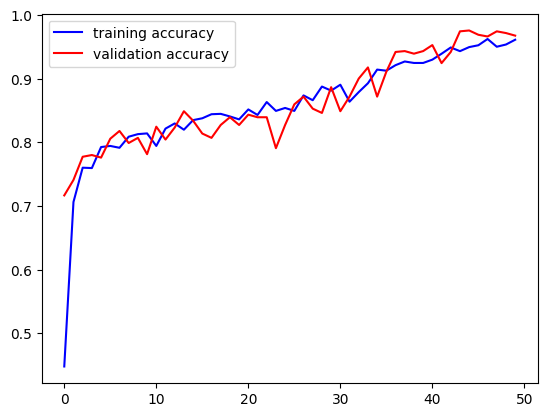

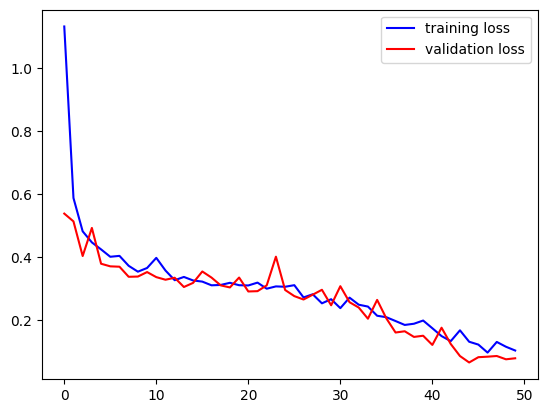

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="training accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="training loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

# Saving the model

In [ ]:
model.save("drowiness_cap2.h5")

In [ ]:
model.save("drowiness_cap2.model")

# Prediction

In [ ]:
prediction = model.predict(X_test)

24/24 [==============================] - 1s 23ms/step


In [ ]:
prediction

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
#predicting function

In [ ]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas="../input/prediction-images/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("./drowiness_cap2.h5")

In [ ]:
#Prediction

In [ ]:
prediction = model.predict([prepare("/dataset_new/dataset_new/train/yawn/113.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 284ms/step


0

In [ ]:
prediction = model.predict([prepare("/dataset_new/dataset_new/train/no_yawn/1021.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 26ms/step


1

In [ ]:
prediction = model.predict([prepare("/dataset_new/dataset_new/train/Closed/_101.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 31ms/step


2

In [ ]:
prediction = model.predict([prepare("/dataset_new/dataset_new/train/Open/_104.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 32ms/step


3

# Conclusion:

# With CNN My Model Predicts Accuracy of about 97%